In [19]:
# fitting different models and understanding their performance
%matplotlib inline

In [2]:
# performance of model 
# 1. Accuracy
# 2. Precision and Recall
# 3. AUC and ROC Curve
# 4. Log loss

In [3]:
import numpy as np

def accuracy(y_pred, y_true):
    y_pred = np.array(y_pred)
    y_true = np.array(y_true)
    # print(np.sum(y_pred == y_true))  sum on list of bool values return true for all the true values
    return np.sum(y_pred == y_true) / len(y_true) * 100 
    # range from 0 to 100. 0 means no prediction is correct and 100 means all predictions are correct

x = [1, 2, 3, 4, 5]
y_pred = [0, 0, 1, 1, 1]
y_true = [1, 0, 1, 1, 0]
# important thing to note is let's say 0 is postive class and 1 is negative class but we are not considering anything 
# just focusing on what is correct and what is not correct
print(accuracy(y_pred, y_true))

# Problems - > 
# 1. Accuracy is not a good measure when we have class imbalance problem because if we have 90% of data in one class and 10% in another class then 
#   even if we predict all the data points in the majority class then also we will get 90% accuracy which is not good
# 2. Accuracy is not a good measure when we have multi class classification problem because it is difficult 
# to understand which class is predicted correctly and which is not predicted correctly 
# 3. Accuracy is not a good measure when we have regression problem because we can't say that if we are predicting the value


60.0


In [4]:
# let's implement confusion matrix 
import numpy as np 
def confusion_matrix(y_pred, y_orig):
# i will need to hold values for predictions and what their actual value is  
    y_pred = np.array(y_pred)
    y_orig = np.array(y_orig)
    # we will create conditions according to the confusion matrix 
    tp = np.sum( ( y_orig == 1 ) & ( y_pred == 1 ) ) 
    tn = np.sum( ( y_orig == 0 ) & ( y_pred == 0 ) )
    fp = np.sum( ( y_orig == 0 ) & ( y_pred == 1 ) )
    fn = np.sum( ( y_orig == 1 ) & ( y_pred == 0 ) )
    # get positive rate
    tpr = tp/(tp + fn)
    tnr = tn/(tn + fp)
    fpr = fp/(fp + tn)
    fnr = fn/(fn + tp)
    # precision and recall 
    precision =tp/(tp + fp)
    recall = tp/(tp + fn)
    return tp, tn, fp , fn , tpr, tnr, fpr, fnr, precision, recall

    

y_pred = [ 1, 0 , 1, 1, 0 ,1 , 1 ]
y_orig = [0, 1, 1, 1, 0, 0 , 1 ]
confusion_matrix( y_pred, y_orig)


(3, 1, 2, 1, 0.75, 0.3333333333333333, 0.6666666666666666, 0.25, 0.6, 0.75)

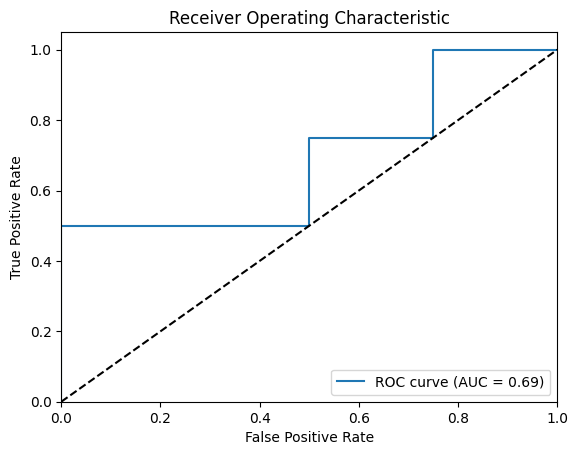

In [5]:
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt

# Example data
y_true = [0, 0, 1, 1, 0, 1, 0, 1]
y_scores = [0.1, 0.3, 0.2, 0.8, 0.6, 0.4, 0.7, 0.9]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [8]:
import numpy as np

def log_loss_(y_pred, y_orig):
    y_pred = np.array(y_pred)
    y_orig = np.array(y_orig)
    # we need clipping of values because classes can be 0 and 1 and log of 0 is not defined
    # undo clipping and see the result of nan
    y_pred = np.clip(y_pred, 1e-15, 1-1e-15)
    log_values_of_pos_pred = np.log(y_pred) * y_orig
    print("printing log of pos" , log_values_of_pos_pred)
    log_value_of_neg_pred = np.log(1-y_pred) * (1-y_orig)
    print("printing log of neg", log_value_of_neg_pred)
    log_loss = -1 * np.mean( log_values_of_pos_pred + log_value_of_neg_pred)
    return log_loss

print("lets run")
y_pred = [1, 0, 1, 1, 0, 1, 1]
y_orig = [0, 1, 1, 1, 0, 0, 1]
log_loss_(y_pred, y_orig)


lets run
printing log of pos [-0.00000000e+00 -3.45387764e+01 -9.99200722e-16 -9.99200722e-16
 -0.00000000e+00 -0.00000000e+00 -9.99200722e-16]
printing log of neg [-3.45395760e+01 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -9.99200722e-16 -3.45395760e+01 -0.00000000e+00]


14.802561197084632

In [ ]:
# let's implement some models of machine learning
# 1. Naive Bayes

In [10]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes classifier
clf = GaussianNB()

# Train the classifier
clf.fit(X_train, y_train)

# Predict the classes for the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = np.mean(y_pred == y_test)
print("Accuracy is :", accuracy)

Accuracy is : 1.0


In [12]:
import pandas as pd 
X = pd.DataFrame(X, columns = iris.feature_names)
y = pd.DataFrame(y, columns = ['target'])

In [14]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [24]:
import numpy as np
from sklearn.linear_model import LogisticRegression


In [25]:
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y = np.array([0, 0, 1, 1, 1])

In [26]:
lr = LogisticRegression()
lr.fit(X,y)

LogisticRegression()

In [37]:
x_min = X[:,0].min() - 1 
x_max = X[:, 0].max()+ 1 
y_min = X[:, 1 ].min() - 1
y_max = X[:,1].max() + 1 
x_min, x_max, y_min, y_max

(0, 6, 1, 7)

In [48]:
print(len(np.meshgrid(np.arange(x_min, x_max, 0.01))[0])) # creates a mesh grid of x values for a given range
(x_max - x_min) * 100

600


600

In [49]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

In [52]:
# ravel function 
# it is used to convert a 2D array into 1D array
x = np.array([[1, 2], [3, 4]])
x.ravel()

array([1, 2, 3, 4])

In [59]:
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])

In [60]:
Z.shape

(360000,)

In [61]:
Z = Z.reshape(xx.shape)

In [63]:
Z.shape

(600, 600)

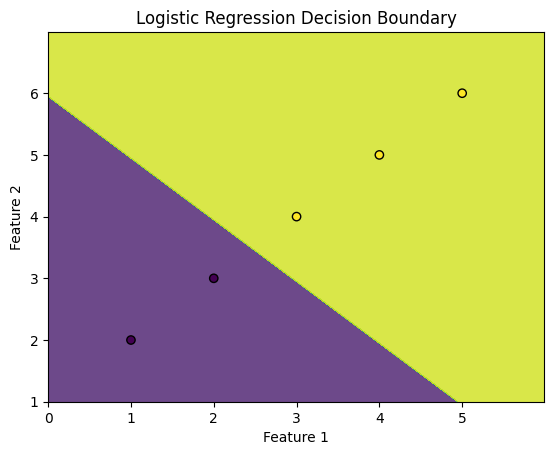

In [64]:
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()